In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
df = pd.read_csv('ReadyPragAirBnB.csv',sep=';', index_col=0)
df.head(5)

RoomID                                             Name     HostID  \
0  25092602   ❤️AMAZING APARTMENT WITH NETFLIX NEAR CENTRE❤️  189676842   
1  25197350    Room in beautiful area close to Prague Castle   28365945   
2  25470062         Luxury apartment in the center of Prague   47717433   
3  25547218      Much More For Your Money In Beautiful Letná   21217319   
4  25907826  Apartment near city transport and Prague center  119497941   

  Neighbourhood         RoomType  Price  MinNights  NumReviews  RoomsPerHost  \
0       Praha 3  Entire home/apt   1310          1          79             1   
1       Praha 6     Private room    763          1           2             1   
2       Praha 2  Entire home/apt   1071          2          84             1   
3       Praha 7  Entire home/apt   2074          1          21             1   
4       Praha 4  Entire home/apt   2504          1          16             1   

   Availibility                         Location   Latitude  Longtitude  \
0           172  Czech republic, Prague, Praha 3  50.086376   14.444495   
1             0  Czech republic, Prague, Praha 6  50.083104   14.369196   
2           109  Czech republic, Prague, Praha 2  50.073298   14.439128   
3             0  Czech republic, Prague, Praha 7  50.102008   14.417981   
4             0  Czech republic, Prague, Praha 4  50.057750   14.450172   

  PriceCategory  
0         nízká  
1         nízká  
2         nízká  
3       střední  
4       střední

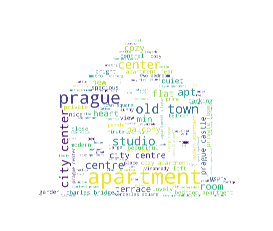

In [58]:
import matplotlib as mp
from wordcloud import WordCloud,STOPWORDS
from PIL import Image

house = np.array(Image.open('domek.jpg'))

names = ' '.join(df['Name'].str.lower().values)
wordcloud = WordCloud(background_color='white',
                        height=900,
                        width=800,
                        scale=20, 
                        prefer_horizontal=0.9999,
                        mask=house 
                     ).generate(names)
plt.figure(figsize=[8, 4])
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('WordName.jpg', dpi=900, bbox_inches='tight', quality=95)
plt.show()

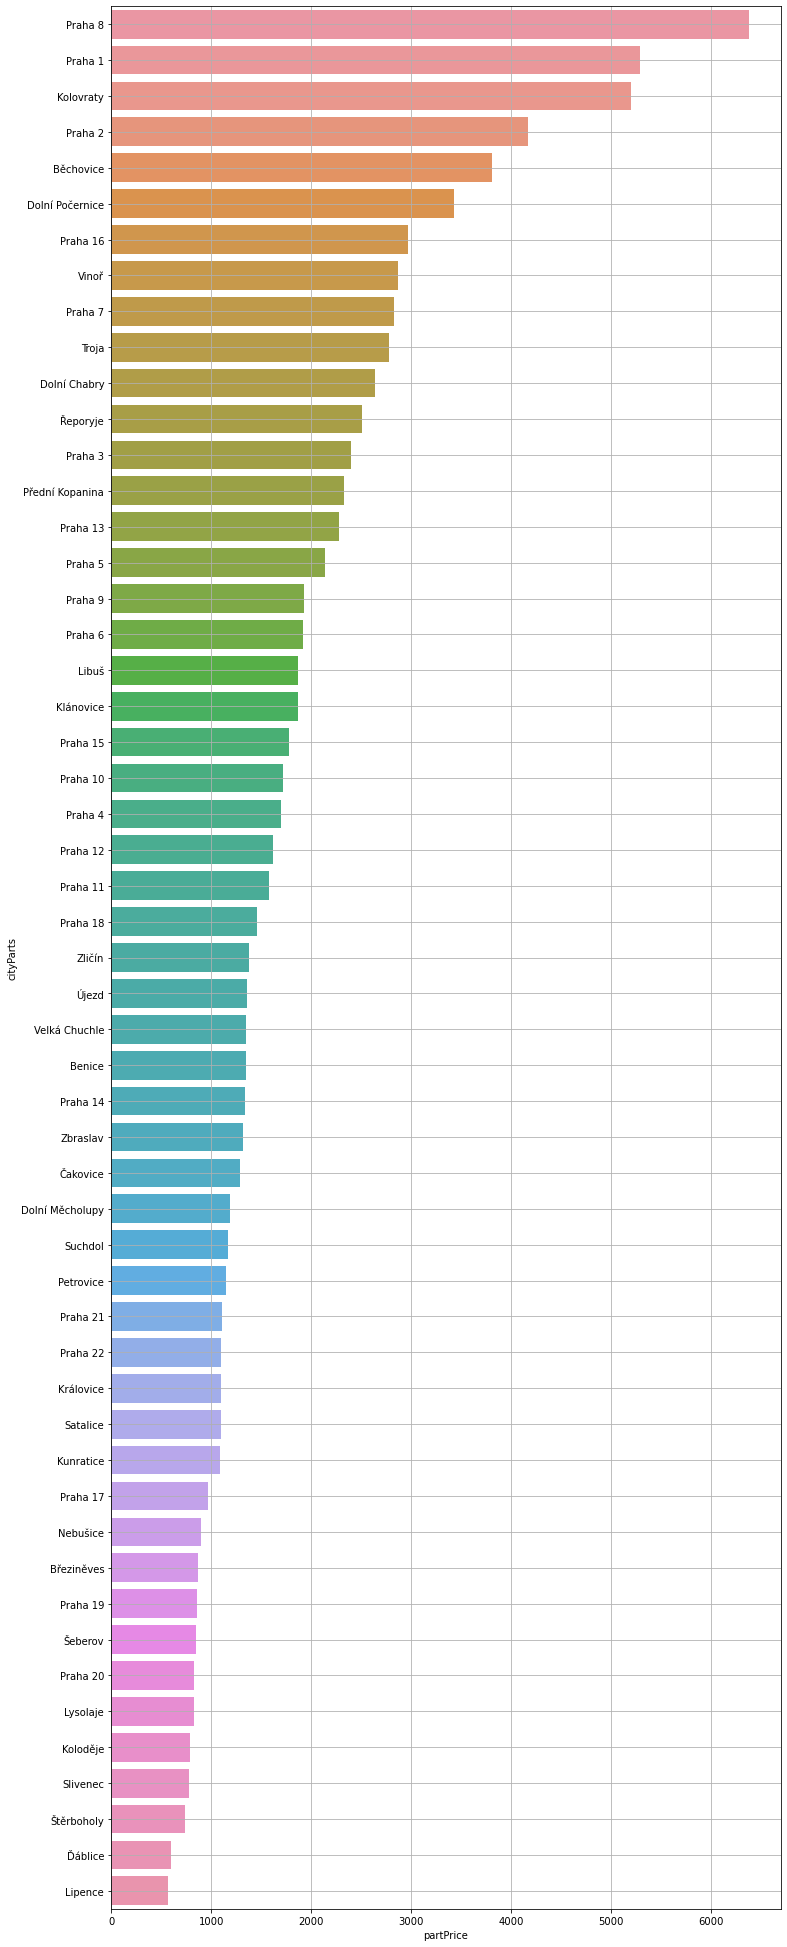

In [204]:
cityParts = list(df['Neighbourhood'].unique())

partPrice=[]

for i in cityParts:
    x=df[df.Neighbourhood==i]
    avgPrice=sum(x.Price)/len(x)
    partPrice.append(avgPrice)

df1=pd.DataFrame({'cityParts':cityParts,'partPrice':partPrice})
new_index=df1.partPrice.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(12,35))
ax=sns.barplot(x=sorted_data.partPrice,y=sorted_data.cityParts)
plt.grid(True)
plt.savefig('CityPartsPrice.png', dpi=1500)

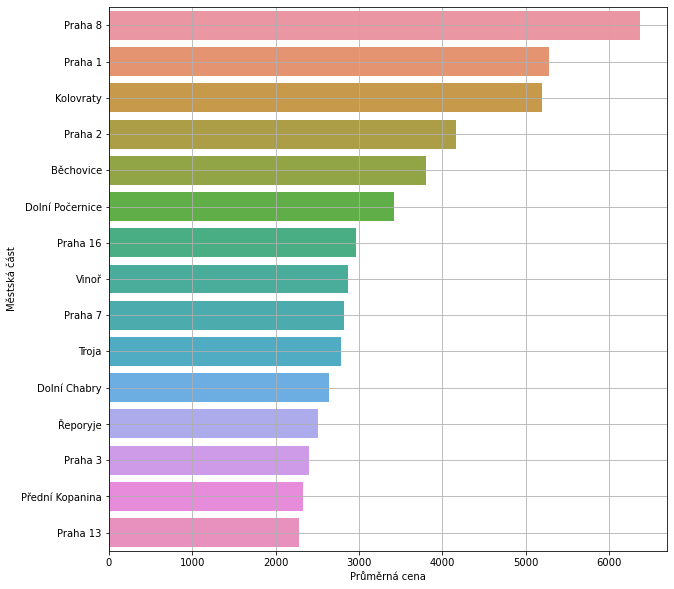

In [213]:
cityParts = list(df['Neighbourhood'].unique())

partPrice=[]

for i in cityParts:
    x=df[df.Neighbourhood==i]
    avgPrice=sum(x.Price)/len(x)
    partPrice.append(avgPrice)

df1=pd.DataFrame({'cityParts':cityParts,'partPrice':partPrice})
new_index=df1.partPrice.sort_values(ascending=False).index.values[:15]
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(10,10))
ax=sns.barplot(x=sorted_data.partPrice,y=sorted_data.cityParts)
plt.grid(True)
plt.xlabel('Průměrná cena')
plt.ylabel('Městská část')
plt.savefig('CityPartsPrice15.png', dpi=1500)

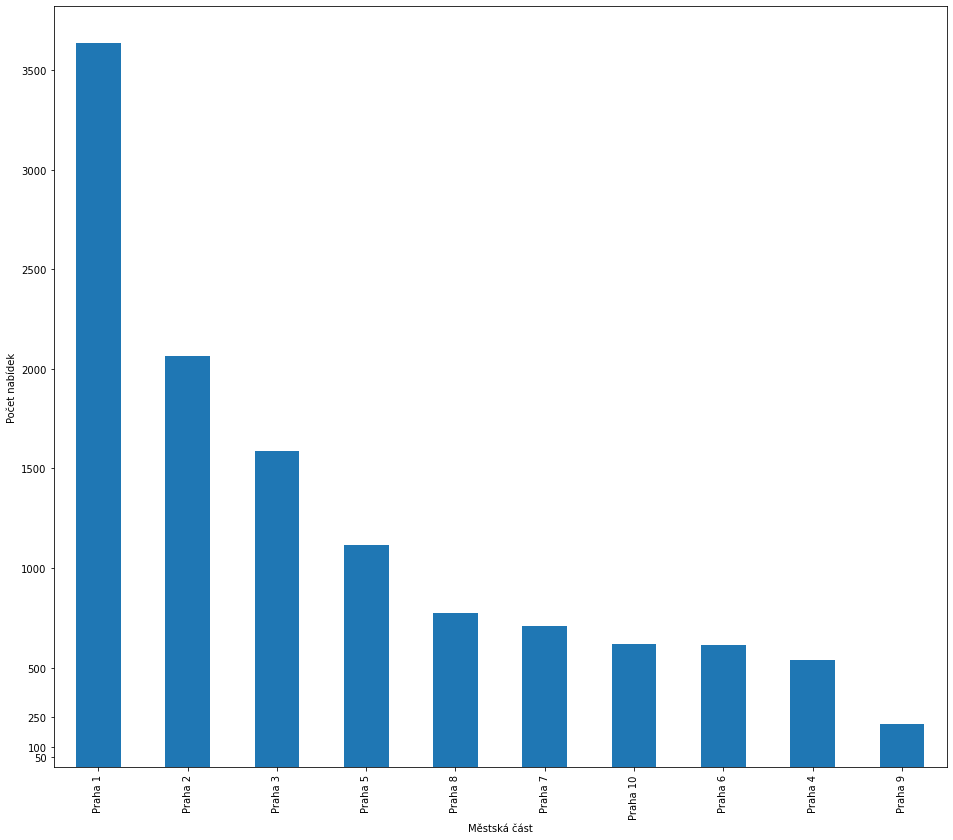

In [198]:
#městské části

fig = plt.figure(figsize=(16,14))
df.groupby('Neighbourhood').nunique()['RoomID'].sort_values(ascending=False)[:10].plot(kind='bar')
plt.ylabel('Počet nabídek') 
plt.xlabel('Městská část')
plt.grid
plt.yticks([50,100,250,500,1000,1500,2000,2500,3000,3500])

plt.savefig('CityParts.png', dpi=1500)
plt.show()



In [1]:
cityParts = list(df['Neighbourhood'].unique())

offersParts=[]
for i in cityParts:
    x=df[df.Neighbourhood==i]
    offersParts=x.count()['RoomID']


df1=pd.DataFrame({'cityParts':cityParts,'offersParts':offersParts})
new_index=df1.offersParts.sort_values(ascending=False).index.values[:150]
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(20,35))
ax=sns.countplot(y=df['Neighbourhood'],order=df['Neighbourhood'].value_counts().index,palette='rocket')
plt.grid(True)
plt.xlabel('Počet nabídek')
plt.ylabel('Městská část')
plt.savefig('CityPartsOffers.png', dpi=1500)

NameError: name 'df' is not defined

([<matplotlib.axis.XTick at 0x1a319366ca0>,
 <a list of 10 Text major ticklabel objects>)

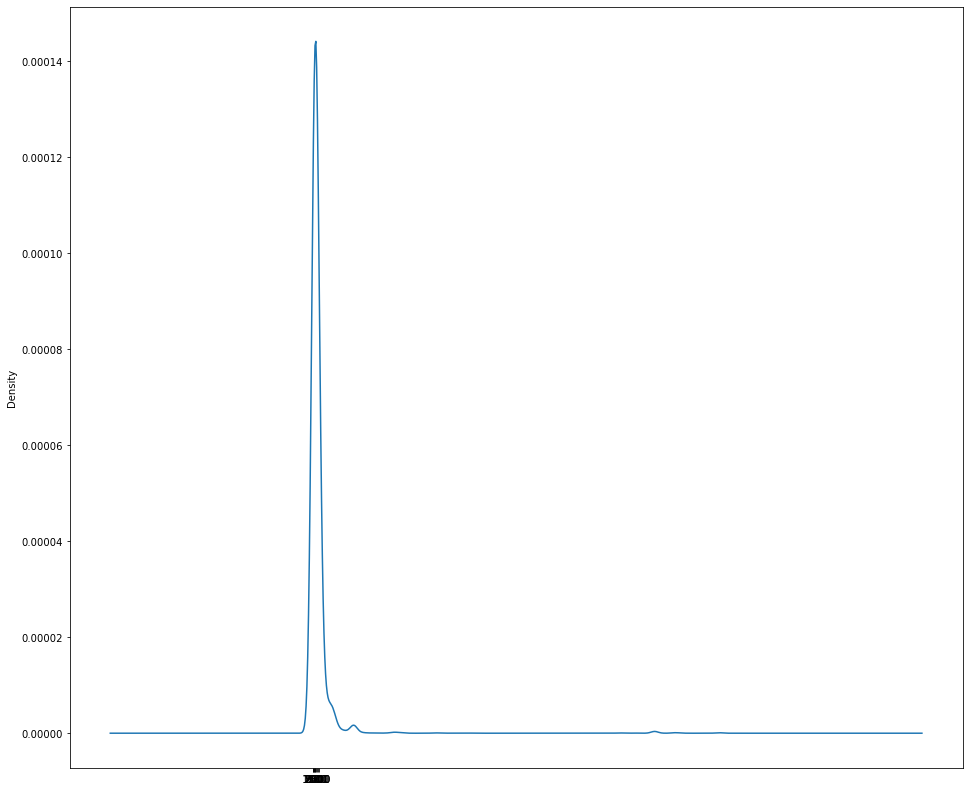

In [134]:
fig = plt.figure(figsize=(16,14))
df['Price'].plot(kind='kde')
plt.xticks([50,100,250,500,1000,1500,2000,2500,3000,3500])

In [147]:
df.groupby('Neighbourhood').mean()['Price'].sort_values(ascending=False)



Neighbourhood
Praha 8            6376.805161
Praha 1            5283.863661
Kolovraty          5198.333333
Praha 2            4163.605327
Běchovice          3810.000000
Dolní Počernice    3423.333333
Praha 16           2967.133333
Vinoř              2867.200000
Praha 7            2824.896893
Troja              2781.440000
Dolní Chabry       2635.117647
Řeporyje           2506.909091
Praha 3            2399.100126
Přední Kopanina    2325.666667
Praha 13           2277.353535
Praha 5            2136.181004
Praha 9            1930.359447
Praha 6            1914.904065
Libuš              1870.812500
Klánovice          1868.454545
Praha 15           1776.133333
Praha 10           1713.511290
Praha 4            1694.212569
Praha 12           1617.163265
Praha 11           1580.402985
Praha 18           1460.880000
Zličín             1373.100000
Újezd              1353.714286
Velká Chuchle      1349.083333
Benice             1343.000000
Praha 14           1336.339286
Zbraslav           1321.6

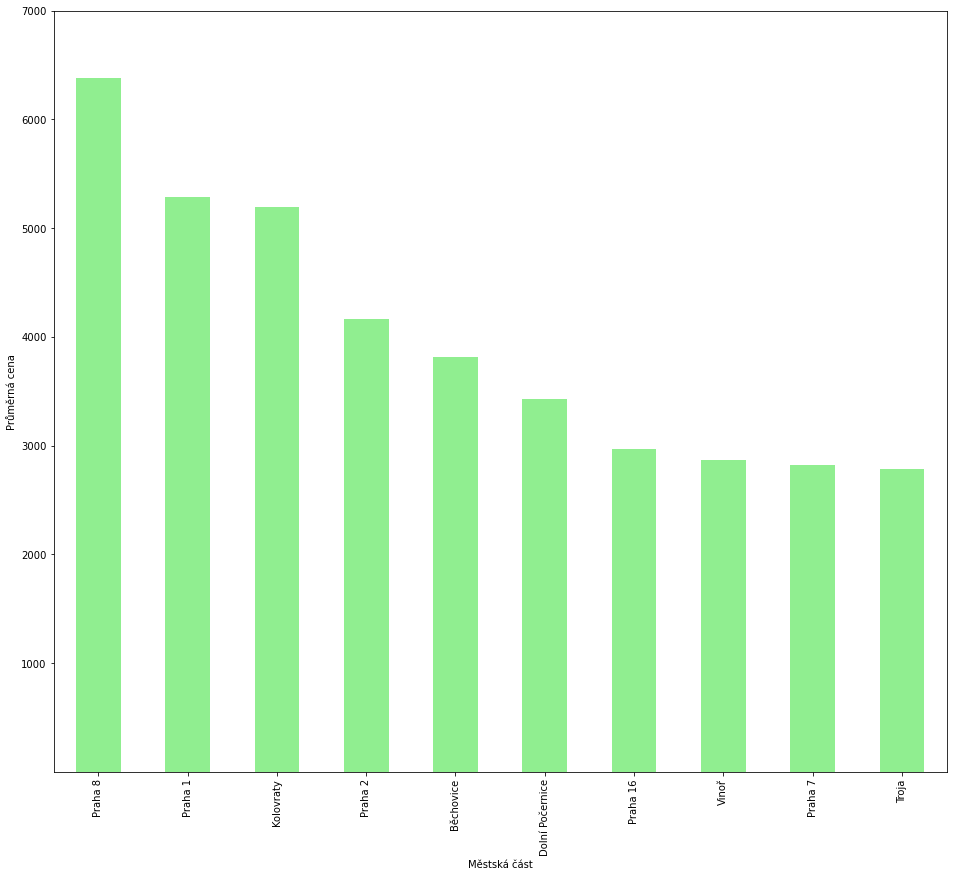

In [214]:
#ceny za městskou část
fig = plt.figure(figsize=(16,14))
df.groupby('Neighbourhood').mean()['Price'].sort_values(ascending=False)[:10].plot(kind='bar',color = 'lightgreen')
plt.ylabel('Průměrná cena') 
plt.xlabel('Městská část')

plt.yticks([1000,2000,3000,4000,5000,6000,7000])
plt.savefig('PriceCityParts.png', dpi=1500)
plt.show()

In [229]:
df.groupby('Neighbourhood').count()['RoomID'].sort_values(ascending=False)

Neighbourhood
Praha 1            3638
Praha 2            2065
Praha 3            1588
Praha 5            1116
Praha 8             775
Praha 7             708
Praha 10            620
Praha 6             615
Praha 4             541
Praha 9             217
Praha 13             99
Praha 11             67
Praha 14             56
Praha 12             49
Praha 15             45
Praha 18             25
Troja                25
Praha 17             25
Zbraslav             20
Zličín               20
Dolní Chabry         17
Praha 22             16
Libuš                16
Praha 16             15
Kunratice            14
Praha 20             13
Šeberov              12
Velká Chuchle        12
Petrovice            12
Klánovice            11
Suchdol              11
Řeporyje             11
Praha 21              9
Dolní Počernice       9
Újezd                 7
Březiněves            7
Ďáblice               7
Nebušice              6
Vinoř                 5
Slivenec              5
Benice                5
Do

In [194]:
df['Neighbourhood'].unique()


array(['Praha 3', 'Praha 6', 'Praha 2', 'Praha 7', 'Praha 4', 'Praha 5',
       'Praha 1', 'Praha 13', 'Praha 9', 'Praha 10', 'Čakovice',
       'Praha 8', 'Benice', 'Praha 22', 'Libuš', 'Praha 11', 'Troja',
       'Újezd', 'Přední Kopanina', 'Praha 14', 'Praha 12', 'Zličín',
       'Petrovice', 'Praha 18', 'Dolní Počernice', 'Zbraslav', 'Praha 20',
       'Praha 17', 'Dolní Chabry', 'Lipence', 'Běchovice', 'Praha 15',
       'Praha 21', 'Kunratice', 'Nebušice', 'Klánovice', 'Řeporyje',
       'Suchdol', 'Dolní Měcholupy', 'Satalice', 'Ďáblice',
       'Velká Chuchle', 'Březiněves', 'Štěrboholy', 'Šeberov', 'Vinoř',
       'Slivenec', 'Kolovraty', 'Praha 19', 'Praha 16', 'Koloděje',
       'Královice', 'Lysolaje'], dtype=object)

In [195]:
df['Neighbourhood'].nunique()


53

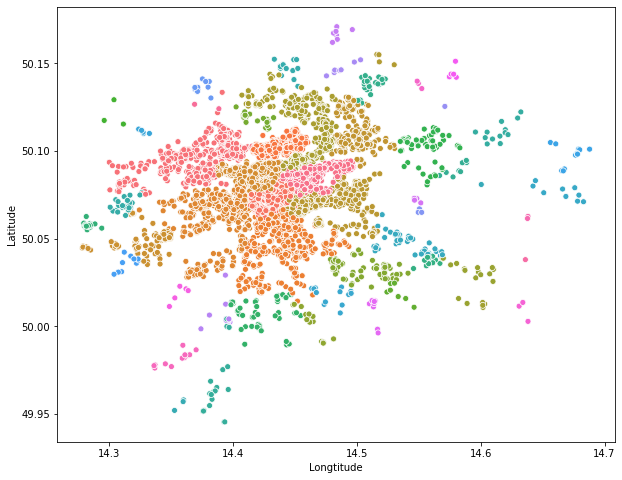

In [105]:
#nabídky dle městské části
plt.figure(figsize=(10,8))

      
sns.scatterplot(df.Longtitude,df.Latitude,hue=df.Neighbourhood,legend=False)
plt.ioff()
plt.savefig('CityPartsPints.png', dpi=1500)

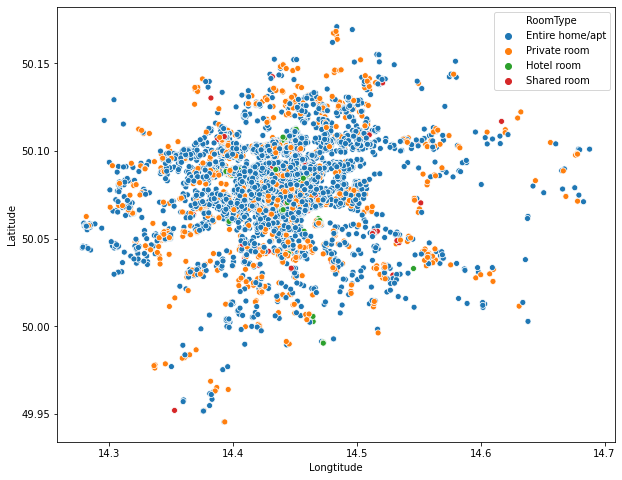

In [181]:
#nabídky dle městské části
plt.figure(figsize=(10,8))

      
sns.scatterplot(df.Longtitude,df.Latitude,hue=df.RoomType)
plt.ioff()
plt.savefig('RoomTypes.png', dpi=1500)

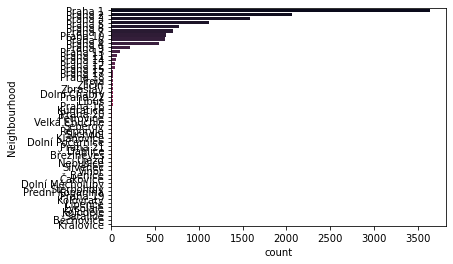

<Figure size 8640x25200 with 0 Axes>

In [234]:
ax = sns.countplot(y=df['Neighbourhood'],order=df['Neighbourhood'].value_counts().index,palette='rocket')

#ax.set_title()
plt.figure(figsize=(120,350))
plt.show()

In [49]:
import folium
from folium.plugins import HeatMap
import io
from PIL import Image
from selenium import webdriver

mapHeat = folium.Map([50.06,14.45],zoom_start=11)
HeatMap(df[['Latitude','Longtitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(mapHeat)

mapHeat.save( 'HeatMap.html')
display(mapHeat)

In [179]:
from folium.plugins import MarkerCluster
mapPoint = folium.Map([50.06,14.45],zoom_start=11)

    
for index, row in df.iterrows():
    if df.PriceCategory[index] == 'nízká':
        folium.CircleMarker( location=[df.Latitude[index], df.Longtitude[index]],color='blue', radius=1 ).add_to( mapPoint )
    elif df.PriceCategory[index] == 'střední':
        folium.CircleMarker( location=[df.Latitude[index], df.Longtitude[index]],color='orange', radius=1 ).add_to( mapPoint )
    elif df.PriceCategory[index] == 'vysoká':
        folium.CircleMarker( location=[df.Latitude[index], df.Longtitude[index]],color='green', radius=1 ).add_to( mapPoint )
    elif df.PriceCategory[index] == 'nejvyšší':
        folium.CircleMarker( location=[df.Latitude[index], df.Longtitude[index]],color='red', radius=1 ).add_to( mapPoint )
        
        
mapPoint.save( 'PointMap.html')
display(mapPoint)

In [168]:
lower_bound = .25
upper_bound = .75
iqr = df[df['Price'].between(df['Price'].quantile(lower_bound), df['Price'].quantile(upper_bound), inclusive=True)]
priceData = iqr.copy()
desc = priceData.describe()
desc.loc['skew'] = desc.skew()
desc.loc['skew'] = desc.kurt()
pd.set_option('display.float_format', lambda x: '%.5f' % x)
desc

RoomID          HostID      Price  MinNights  NumReviews  \
count     6341.00000      6341.00000 6341.00000 6341.00000  6341.00000   
mean  23353872.53052  96936448.28671 1537.00315    3.90900    51.28970   
std   12497613.88900  96355913.39721  439.18440   32.03093    75.57354   
min      26755.00000     78305.00000  952.00000    1.00000     0.00000   
25%   13712983.00000  17622491.00000 1190.00000    1.00000     3.00000   
50%   22651313.00000  59924893.00000 1476.00000    2.00000    18.00000   
75%   34296897.00000 157893147.00000 1881.00000    2.00000    69.00000   
max   43969844.00000 351870968.00000 2504.00000 1125.00000   545.00000   
skew        -0.76408         3.66864    5.32017    8.18927     8.82285   

       RoomsPerHost  Availibility   Latitude  Longtitude  
count    6341.00000    6341.00000 6341.00000  6341.00000  
mean        9.82795     140.68806   50.08080    14.43195  
std        17.69706     137.80815    0.01741     0.03431  
min         1.00000       0.00000   49.96117    14.27949  
25%         1.00000       0.00000   50.07342    14.41681  
50%         2.00000      91.00000   50.08067    14.42974  
75%         9.00000     275.00000   50.08997    14.44818  
max       104.00000     365.00000   50.15212    14.68792  
skew        8.99375       8.90440    8.99742     8.99981

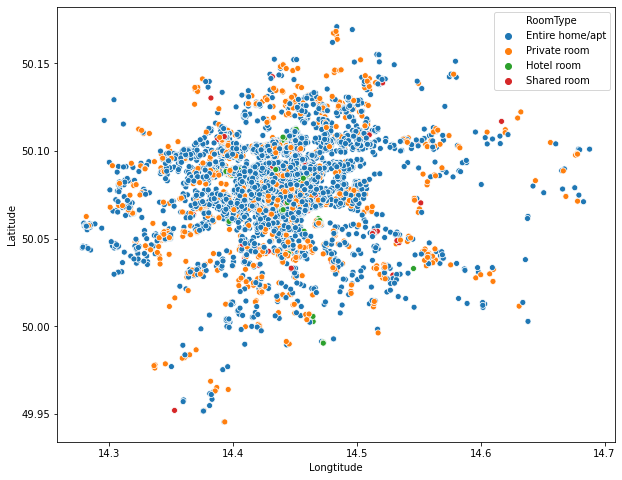

In [125]:
#Typy nabídek
plt.figure(figsize=(10,8))    
sns.scatterplot(df.Longtitude,df.Latitude, hue=df.RoomType, legend='full')
plt.ioff()
plt.savefig('RoomTypesPints.png', dpi=1500)

In [157]:
df.RoomType.unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [167]:
import plotly.express as ex
#typy nabídek pie chart


offerTypes = df.groupby('RoomType').nunique()['RoomID'].sort_values(ascending=False)
typeNames = df.RoomType.unique()
fig = ex.pie(df, values=offerTypes, names=typeNames,hole=0.4,color=typeNames, color_discrete_map={'Entire home/apt':'#1a53ff',
                                 'Private room':'#ff9900',
                                 'Hotel room':'green',
                                 'Shared room':'red'})
fig.update_traces(textinfo='percent+value')
fig.show()
fig.write_image('typesPieChart.png')

In [142]:
df.groupby('RoomType').nunique()['RoomID'].sort_values(ascending=False)

RoomType
Entire home/apt    9659
Private room       2309
Hotel room          416
Shared room         181
Name: RoomID, dtype: int64

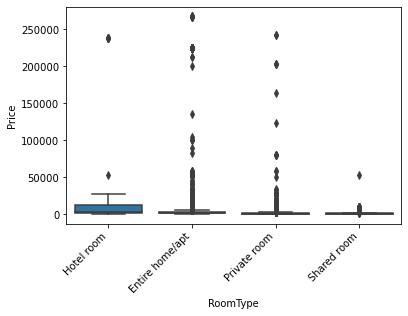

In [185]:
sort_price = df.loc[(df.Price <= 6000000) & (df.Price > 0)]\
                    .groupby('RoomType')['Price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='Price', x='RoomType', data=df.loc[(df.Price <= 600000) & (df.Price > 0)], order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()